<a href="https://colab.research.google.com/github/abdoulahat/Apprentissage/blob/master/Tensorflow2_2_LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow 
print(tensorflow.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

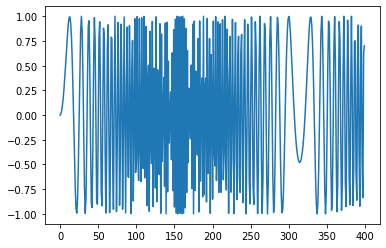

In [7]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

# plot it
plt.plot(series)
plt.show()

In [8]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


# **Linear regression**

In [25]:
## try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer=Adam(lr=0.01),
)

# train th RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
7/7 [==============================] - 0s 13ms/step - loss: 1.2330 - val_loss: 1.5466
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 1.0630 - val_loss: 1.3705
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 0.9316 - val_loss: 1.2110
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.8336 - val_loss: 1.0842
Epoch 5/80
7/7 [==============================] - 0s 6ms/step - loss: 0.7597 - val_loss: 0.9937
Epoch 6/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7001 - val_loss: 0.9112
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6490 - val_loss: 0.8564
Epoch 8/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6171 - val_loss: 0.8053
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5883 - val_loss: 0.7650
Epoch 10/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5647 - val_loss: 0.7403
Epoch 11/80
7/7 [=====================

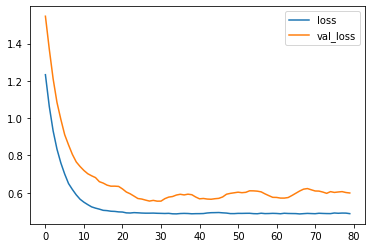

In [26]:
# Pot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


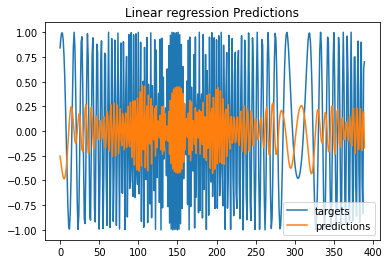

In [27]:
# One-step forcast using true targets
# None: even the one-step forcast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear regression Predictions')
plt.legend()
plt.show()

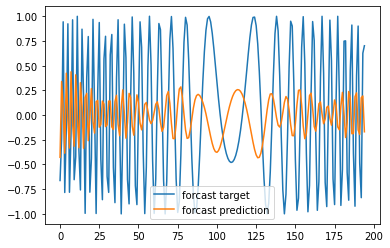

In [28]:
# This the code we had before - it does the same thing

# One-step forcast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forcast target')
plt.plot(validation_predictions, label='forcast prediction')
plt.legend()

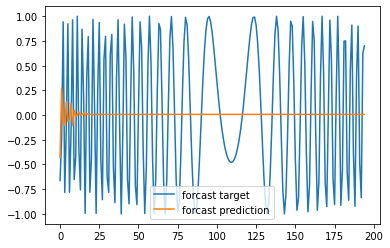

In [29]:
# Multi-step forcast
validation_target = Y[-N//2:]
validation_predictions = []

# last train target
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forcast target')
plt.plot(validation_predictions, label='forcast prediction')
plt.legend()

# **LSTM**

In [20]:
## Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer=Adam(lr=0.05),
)

# train th RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size = 32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/200
7/7 [==============================] - 0s 56ms/step - loss: 0.5544 - val_loss: 0.5301
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5080 - val_loss: 0.5819
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.5197 - val_loss: 0.5365
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4896 - val_loss: 0.5116
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4606 - val_loss: 0.4684
Epoch 6/200
7/7 [==============================] - 0s 34ms/step - loss: 0.4259 - val_loss: 0.4807
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3811 - val_loss: 0.5203
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3375 - val_loss: 0.4340
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.2396 - val_loss: 0.2287
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1630 - val_loss: 0.1617
Epoch 11/200
7/7 [======

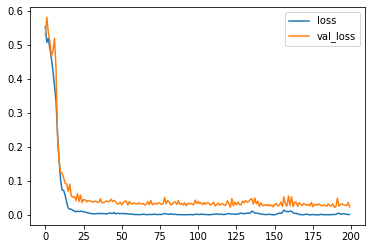

In [21]:
# Pot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


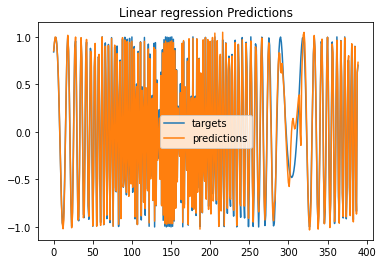

In [22]:
# One-step forcast using true targets
# None: even the one-step forcast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear regression Predictions')
plt.legend()
plt.show()

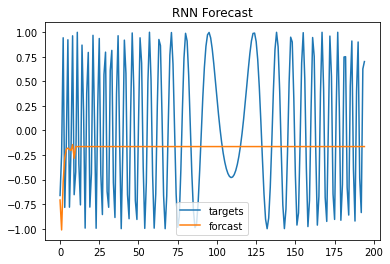

In [24]:
# Multi-step forcast
forcast = []
input_ = X[-N//2]

while len(forcast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, -1))[0, 0] # 1x1 array -> scalar
  forcast.append(f)

  # make the new input
  input_ = np.roll(input_, -1)
  input_[-1] = p

plt.plot(Y[-N//2:], label='targets')
plt.plot(forcast, label='forcast')
plt.title("RNN Forecast")
plt.legend()
plt.show()